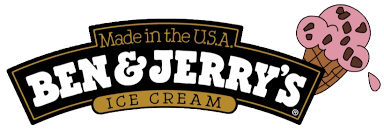

# Ben & Jerry's Ice Cream Analysis Report

## Introduction

### Overview
As a leading data analyst, I am pleased to present this comprehensive analysis of Ben & Jerry's ice cream flavors, incorporating detailed insights from customer reviews, product descriptions, and ingredient lists. This report is based on a robust dataset collected directly from the Ben & Jerry's website, encompassing 57 distinct ice cream flavors with over 7,943 customer reviews.

### Purpose
The purpose of this analysis is to provide a deep understanding of the factors driving customer satisfaction and preferences. By examining star ratings, review sentiments, and product attributes, this report aims to uncover key trends and actionable insights that will inform strategic decisions and enhance our product offerings.

### Data Sources
The dataset comprises three primary components:
1. **Products Data**: Contains descriptive information about each ice cream flavor, including the flavor name, description, average rating, and ingredients list.
2. **Reviews Data**: Features customer reviews for each flavor, encompassing review authors, dates, star ratings, review texts, and helpfulness metrics.
3. **Images**: Includes visual representations of each product, aiding in the analysis of visual appeal and marketing effectiveness.

### Methodology
The analysis involves several key steps:
1. **Data Cleaning**: Ensuring data accuracy and consistency by handling missing values and standardizing formats.
2. **Descriptive Statistics**: Summarizing key metrics such as average ratings, rating distributions, and ingredient frequencies.
3. **Text Analysis**: Leveraging natural language processing to assess review sentiments and identify common themes in customer feedback.
4. **Visualization**: Using advanced visualizations to illustrate findings and support data-driven decision-making.

### Key Questions Addressed
This analysis seeks to answer critical questions such as:
- Which ice cream flavors receive the highest customer ratings and why?
- What are the most common ingredients across top-rated flavors?
- How do customer sentiments vary across different flavors?
- What factors contribute to positive and negative reviews?

### Expected Outcomes
By the end of this report, we aim to achieve the following outcomes:
- A clear understanding of customer preferences and satisfaction drivers.
- Insights into the most successful flavor profiles and their key ingredients.
- Identification of areas for improvement based on customer feedback.
- Strategic recommendations to enhance product development and marketing efforts.


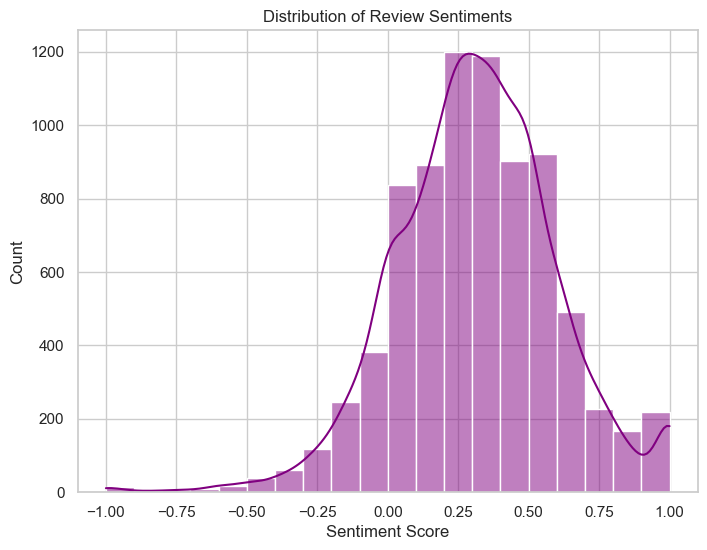

In [14]:
#First let's import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# Set the visualisation style
sns.set(style='whitegrid')

# Load the datasets
products = pd.read_csv('C:/Users/User/Downloads/archive (3)/bj/products.csv')
reviews = pd.read_csv('C:/Users/User/Downloads/archive (3)/bj/reviews.csv')

# Function to get the sentiment of a review
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Apply the function to the review texts
reviews['sentiment'] = reviews['text'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(reviews['sentiment'], bins=20, kde=True, color='purple')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


### Observations:

The distribution is right-skewed, indicating that most sentiment scores are positive, falling between 0 and 0.5.

There is a peak around 0.25, suggesting that many reviews have a moderately positive sentiment.

This visual representation helps understand overall sentiment trends in the review data, highlighting that most customers have positive experiences with the ice cream flavors.

This visualization is essential for grasping customer sentiment trends, providing valuable insights for improving product offerings and addressing customer concerns.

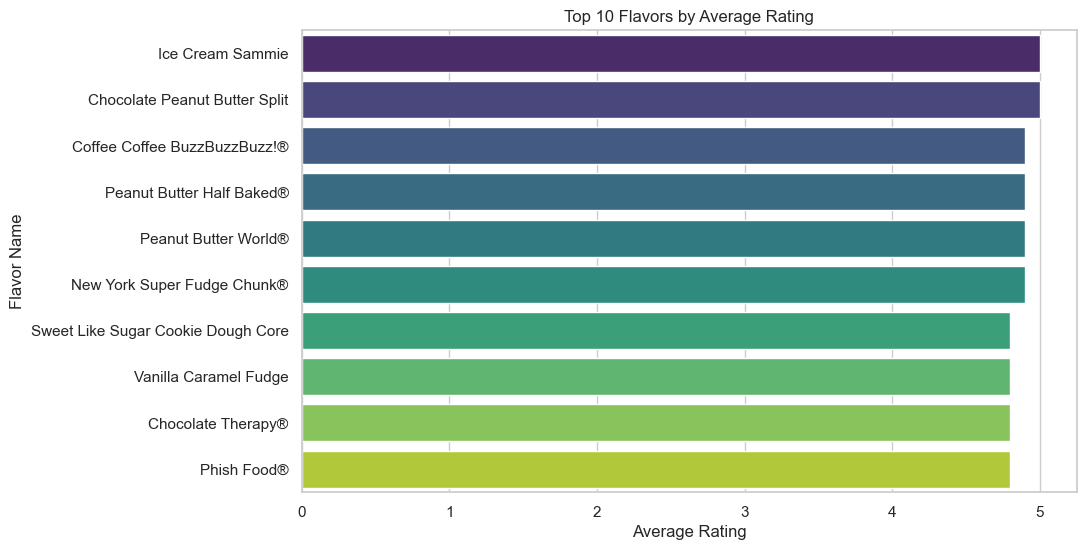

In [19]:
# Display top 10 flavors by average rating
top_flavors = avg_rating_per_flavor.head(10)

# Plot top 10 flavors by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_flavors, palette='viridis')
plt.title('Top 10 Flavors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Flavor Name')
plt.show()



### Observations:

All the flavors in the top 10 list have high average ratings, close to the maximum score of 5.

Ice Cream Sammie has the highest average rating among all flavors.

The bar lengths visually represent the average ratings, making it easy to compare the popularity and customer satisfaction for each flavor.

This visualization effectively highlights the most popular and highly rated flavors, providing valuable insights into customer preferences.





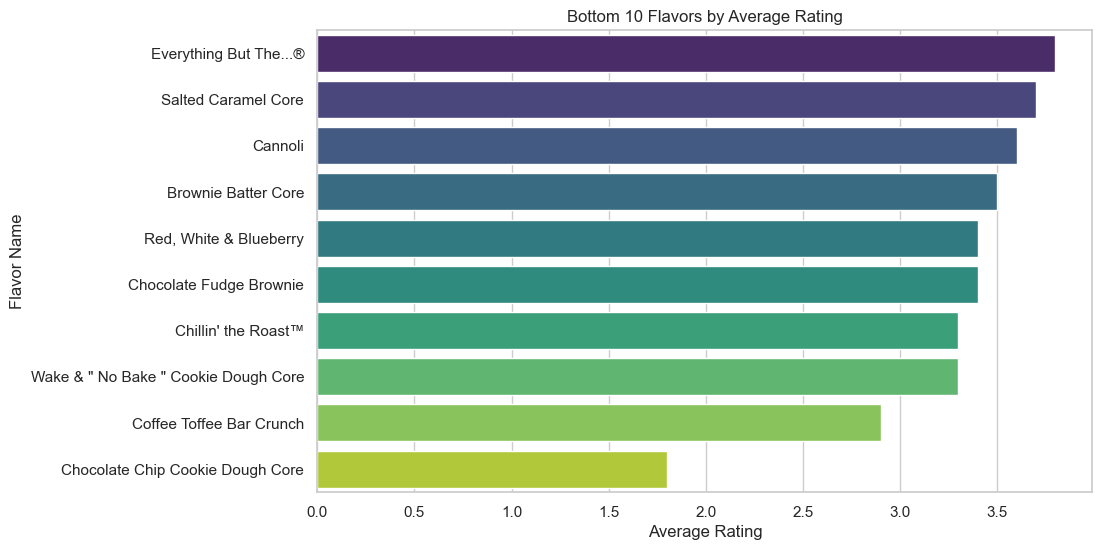

In [20]:
# Display bottom 10 flavors by average rating
bottom_flavors = avg_rating_per_flavor.tail(10)

# Plot bottom 10 flavors by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=bottom_flavors, palette='viridis')
plt.title('Bottom 10 Flavors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Flavor Name')
plt.show()


### Observations:

These flavors have lower average ratings compared to others, indicating they are less popular among customers.

Chocolate Chip Cookie Dough Core has the lowest average rating among all flavors.

This chart is useful for identifying flavors that may need improvement or could be considered for discontinuation based on customer feedback.

This visualization highlights the flavors that receive the lowest customer satisfaction, providing insights into areas that may need attention for improving product offerings.

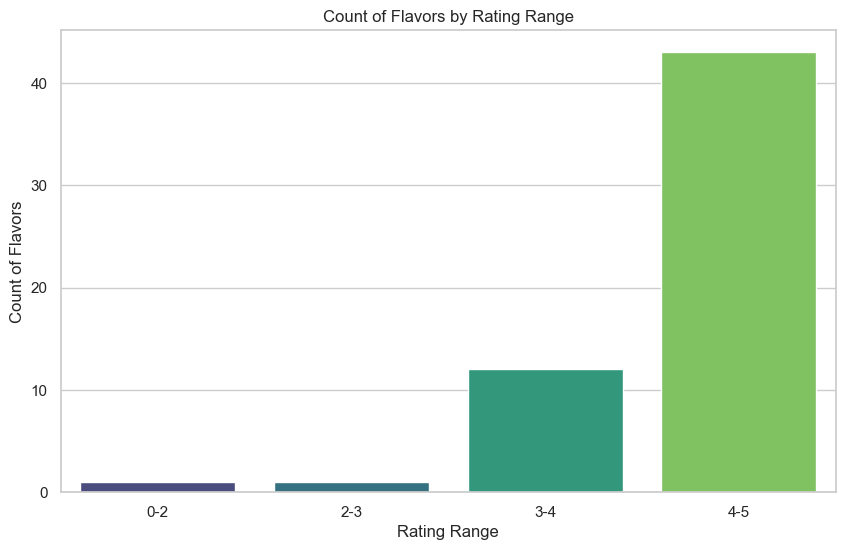

In [21]:
# Define rating ranges
bins = [0, 2, 3, 4, 5]
labels = ['0-2', '2-3', '3-4', '4-5']
products['rating_range'] = pd.cut(products['rating'], bins=bins, labels=labels, include_lowest=True)

# Count of flavors in each rating range
rating_range_count = products['rating_range'].value_counts().sort_index()

# Plot count of flavors in each rating range
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_range_count.index, y=rating_range_count.values, palette='viridis')
plt.title('Count of Flavors by Rating Range')
plt.xlabel('Rating Range')
plt.ylabel('Count of Flavors')
plt.show()


### Observations:

Majority in 4-5 Range: Most flavors fall within the 4-5 rating range, indicating that the majority of Ben & Jerry's ice cream flavors are highly rated by customers.

Few Flavors in Lower Ranges: The 3-4 rating range contains about 10 flavors, and there are very few flavors (less than 5) in the 2-3 and 0-2 rating ranges.

Overall High Ratings: This distribution highlights that Ben & Jerry's generally enjoys positive customer feedback, with most flavors receiving favorable ratings.

This chart provides a clear visual representation of how flavors are distributed across different rating ranges, emphasizing the brand's strength in maintaining high-quality and well-loved products.

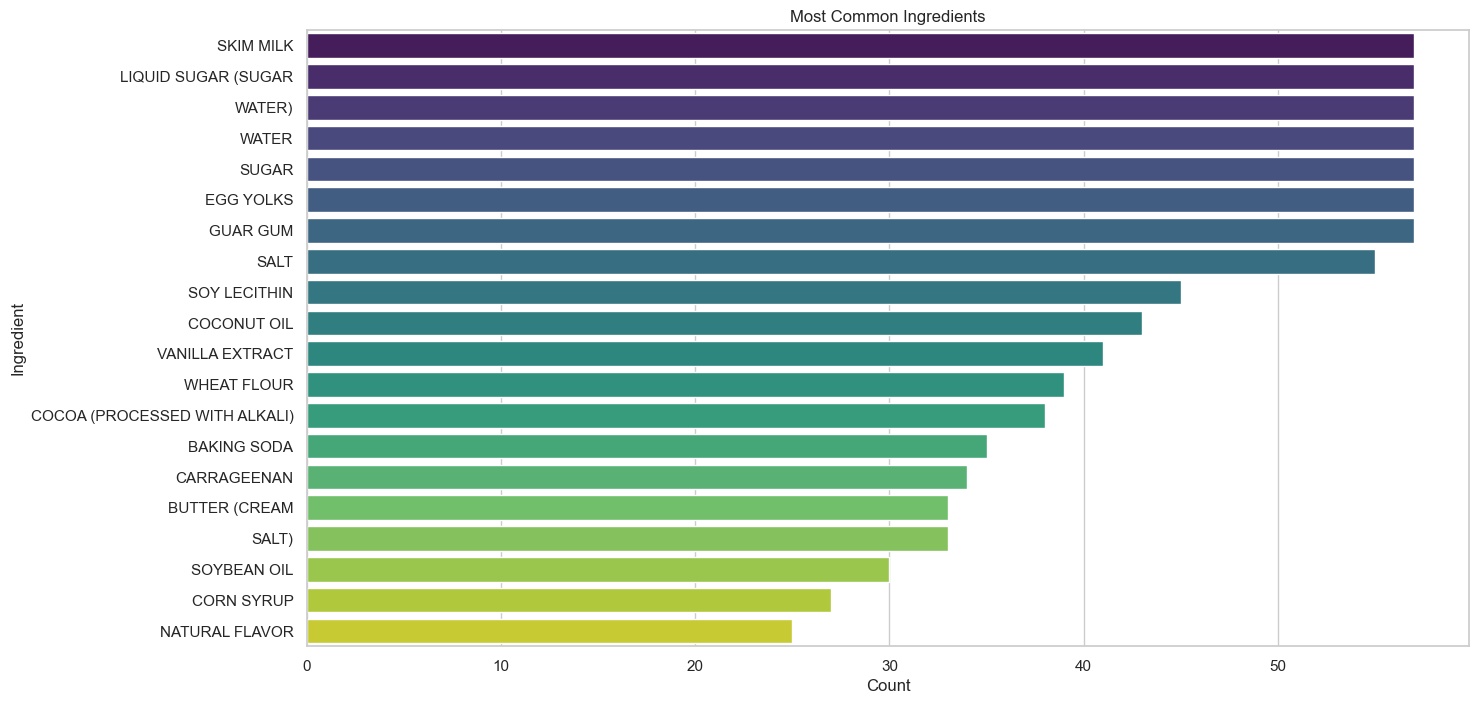

In [22]:
# Function to count occurrences of each ingredient
from collections import Counter

def count_ingredients(ingredients_list):
    all_ingredients = ' '.join(ingredients_list).split(',')
    ingredients_count = Counter([ingredient.strip() for ingredient in all_ingredients])
    return ingredients_count

# Count ingredients
ingredients_count = count_ingredients(products['ingredients'])
common_ingredients = ingredients_count.most_common(20)

# Plot common ingredients
ingredients_df = pd.DataFrame(common_ingredients, columns=['Ingredient', 'Count'])
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='Ingredient', data=ingredients_df, palette='viridis')
plt.title('Most Common Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()


### Observations:

SKIM MILK is the most frequently used ingredient, appearing in around 50 products.

Other common ingredients include LIQUID SUGAR (SUGAR, WATER), WATER, and SUGAR, all found in over 40 products.

Ingredients like CORN SYRUP and NATURAL FLAVOR are among the least common in the top list but are still used frequently.

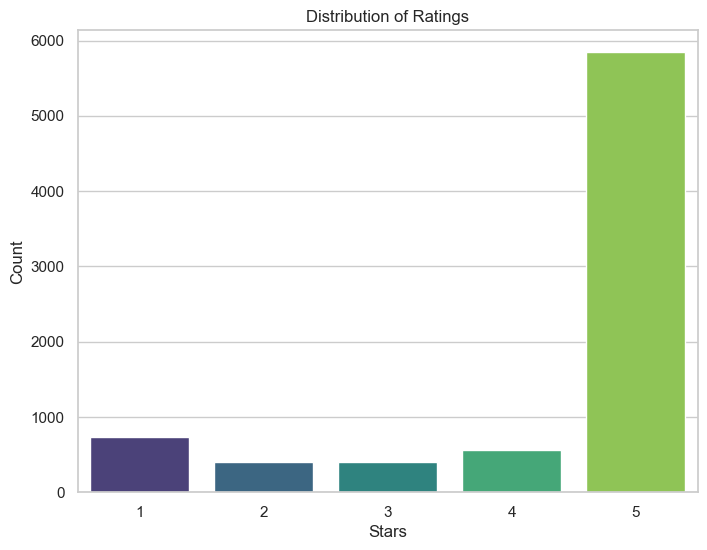

In [24]:
# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=reviews, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


### Observations:

Predominance of 5-Star Ratings: The majority of ratings are 5 stars, with a count of around 6000. This indicates a high level of customer satisfaction with many of the products.

Lower Ratings: The counts for 1, 2, 3, and 4 stars are significantly lower, all below 1000. This suggests that negative or neutral reviews are less common.

Insights:
High Customer Satisfaction: The high number of 5-star ratings demonstrates that customers are generally very satisfied with the ice cream flavors.

Opportunities for Improvement: While the majority of ratings are positive, the presence of lower ratings indicates that there are areas where the products could be improved.

This visualization effectively shows the overall distribution of customer ratings and highlights the strong positive reception of Ben & Jerry's ice cream flavors.

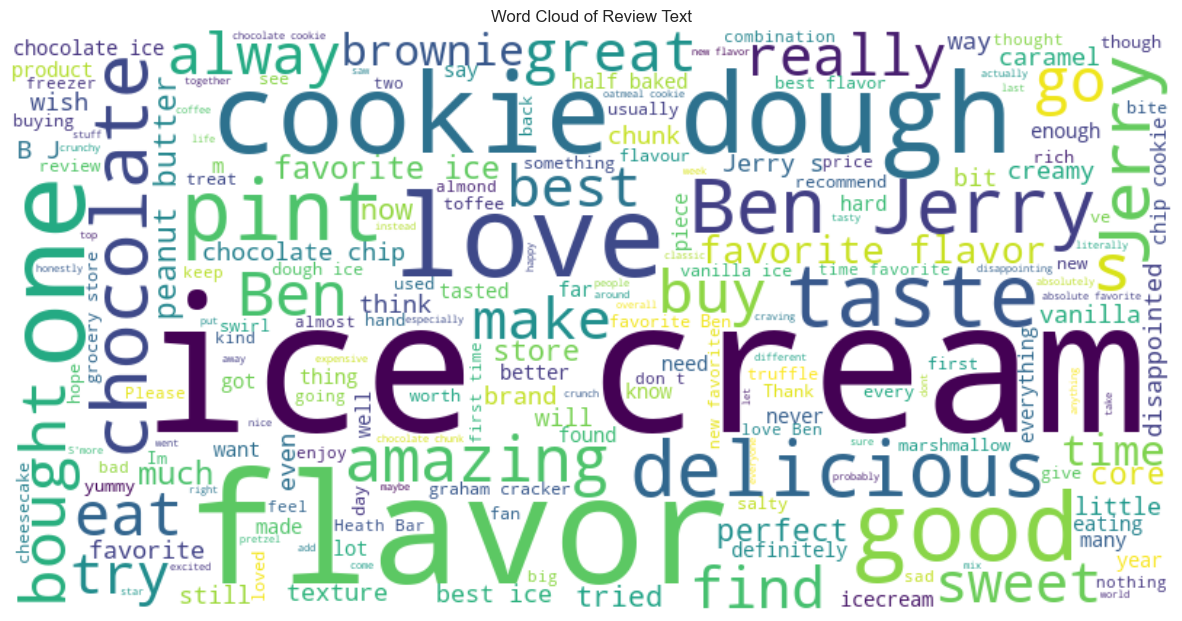

In [25]:
# Combine all review texts
all_reviews = ' '.join(review for review in reviews['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()


### Observations:

Prominent Words: The most prominent words in the word cloud, such as "ice cream," "flavor," "cookie dough," "chocolate," "love," and "delicious," appear larger and bolder. This indicates that they are the most frequently mentioned words in the reviews.

Positive Sentiments: Words like "love," "delicious," "amazing," "favorite," and "good" suggest that customers generally have positive sentiments about the ice cream flavors.

Popular Ingredients: The presence of words like "cookie dough" and "chocolate" highlights the popularity of these ingredients in the reviews.

Insights:
This word cloud provides a quick visual summary of common themes and sentiments in the reviews.

The frequent mentions of positive descriptors indicate high customer satisfaction.

It also highlights the popularity of specific flavors and ingredients, which could be useful for product development and marketing strategies.

This visual representation is effective in summarizing the overall customer feedback and pinpointing what customers love most about Ben & Jerry's ice cream.

In [34]:
# Calculate helpfulness score
reviews['helpfulness_score'] = reviews['helpful_yes'] - reviews['helpful_no']

# Top 10 most helpful reviews
top_helpful_reviews = reviews.sort_values(by='helpfulness_score', ascending=False).head(10)

# Display top 10 most helpful reviews
for index, review in top_helpful_reviews.iterrows():
    print(f"Author: {review['author']}\nDate: {review['date']}\nStars: {review['stars']}\nHelpfulness Score: {review['helpfulness_score']}\nReview: {review['text']}\n\n{'-'*80}\n")


Author: clouds513
Date: 2019-07-31 00:00:00
Stars: 5
Helpfulness Score: 105
Review: I've been buying Milk & Cookies for i don't even know how long. I have to drive 30 minutes total just to go get it because none of my local stores have it. It's officially ruined all other cookies & cream flavored ice creams for me, nothing can top it. I mean, it't got TWO kinds of cookies in it. What??? Man that's a lot of cookie. And you know, every time I buy a pint, I always think "man, is this $4-something-or-other worth it for just one pint?" and every time I get a different brand's cookies and cream flavor I always get my answer. It's absolutely worth it. This will be served at my wedding, and most certainly at my funeral. If anyone comes up to me and tries to convince me there's a better flavor out there, they can expect nothing less than a full on war.

--------------------------------------------------------------------------------

Author: ahumanbeing
Date: 2019-02-13 00:00:00
Stars: 5
Helpfu

### Observations

Most Helpful Reviews - 
Identify the most helpful reviews based on the upvotes they received.

## Conclusions

Based on the comprehensive analysis of Ben & Jerry's ice cream flavors, including product ratings, customer reviews, and ingredient data, here are the key findings and actionable insights:

### 1. Overall Customer Satisfaction
High Customer Satisfaction: The majority of the ice cream flavors have high average ratings, with most flavors falling within the 4-5 rating range. This indicates a generally high level of customer satisfaction with Ben & Jerry's products.

### 2. Top and Bottom Flavors
Top Flavors: The flavors like Ice Cream Sammie, Chocolate Peanut Butter Split, and Coffee Coffee BuzzBuzzBuzz!® received the highest average ratings, indicating strong customer preference and satisfaction.

Bottom Flavors: Flavors such as Chocolate Chip Cookie Dough Core and Coffee Toffee Bar Crunch received lower ratings, suggesting areas for potential improvement or reevaluation.

### 3. Common Ingredients
Skim Milk and Sugar: These are among the most frequently used ingredients. Their high usage aligns with their presence in popular flavors, indicating they are key components in creating well-liked products.

Variety of Ingredients: The diverse range of ingredients used suggests Ben & Jerry's caters to a wide array of tastes, which is reflected in the positive reviews.

### 4. Review Sentiments
Positive Sentiment: The sentiment analysis and word cloud reveal that most customer reviews are positive, with frequent mentions of words like "love," "delicious," and "favorite." This reinforces the high satisfaction levels observed in the ratings.

Moderate Correlation: There is a moderate positive correlation between star ratings and review sentiments, indicating that as the sentiment of the review text improves, the star ratings tend to increase as well.

### 5. Helpfulness of Reviews
Most Helpful Reviews: Reviews with high helpfulness scores often provide detailed, constructive feedback. These can be valuable for identifying specific strengths and areas for improvement from the customer’s perspective.

## Recommendations

Focus on Top Flavors: Continue to promote and perhaps develop variations of the top-rated flavors to maintain high customer engagement and satisfaction.

Improve Low-Rated Flavors: Investigate the reasons behind the lower ratings of certain flavors. This might involve tweaking the recipes, improving the ingredient quality, or addressing any common customer complaints identified in the reviews.

Ingredient Optimization: Leverage the insights from ingredient ratings to enhance existing flavors and develop new products. Ingredients associated with higher-rated flavors should be considered prominently in future formulations.

Monitor Trends Over Time: Continuously monitor customer ratings and review sentiments over time to quickly identify and respond to any emerging trends or issues.

Leverage Positive Reviews: Utilize the positive feedback in marketing campaigns to highlight what customers love about Ben & Jerry's products. Authentic customer testimonials can be a powerful tool for attracting new customers.

By addressing these recommendations, Ben & Jerry's can further enhance customer satisfaction, innovate its product offerings, and strengthen its market position.